# **Treinamento teórico-prático em análise de variantes genéticas**
Neste treinamento abordaremos aplicações práticas de bioinformática para análise de variantes genéticas, destacando sua importância na pesquisa, no diagnóstico e no tratamento do câncer através dos seguintes tópicos:

1. Apresentação do Google Colab
2. Instalando bibliotecas e o gerenciador mamba através do PIP
3. Download do genoma de referência e sequências de interesse
4. Análise de qualidade de dados em sequenciamento Illumina - formato Fastq
5. Alinhamento das leituras de sequenciamento contra um genoma de referência
6. Visualização de alinhamento
7. Chamada de Variantes
8. Anotação de variantes

Use Ctrl+Enter para executar o conteúdo de uma 'célula' de código

Use Shift+Enter para executar código selecionado pelo mouse

Para começar, vamos instalar algumas bibliotecas e pacotes que serão usados ao longo do minicurso



---



# **1. Apresentação do Google Colab**



💬 ❗O **Google Colab** (ou Google Colaboratory) é uma ferramenta gratuita baseada na nuvem, desenvolvida pelo Google, que permite criar, executar e compartilhar notebooks interativos no estilo do Jupyter Notebook diretamente no navegador. Ele é amplamente utilizado para programação em Python, especialmente em áreas como ciência de dados, aprendizado de máquina e análise de dados.

**Documentação com Markdown**: Combina código, texto explicativo e visualizações em um único documento interativo.

**Ambiente na Nuvem**: Não requer instalação local; todo o processamento ocorre em servidores remotos.

**Integração com Google Drive**: Facilita o armazenamento e compartilhamento de notebooks e dados.

**Bibliotecas Pré-instaladas**: Inclui ferramentas populares como TensorFlow, PyTorch, NumPy e Pandas.





---



Esta é uma caixa de texto. Clique duas vezes para entrar no modo edição.




💬 ❗  O código em Python abaixo verifica os recursos computacionais disponíveis na máquina da nuvem google colab



In [2]:
import os
import psutil

# Número de processadores lógicos e físicos
num_logical_processors = os.cpu_count()
num_physical_cores = psutil.cpu_count(logical=False)

# Informações de memória RAM
total_ram = psutil.virtual_memory().total / (1024 ** 3)  # Convertendo para GB
available_ram = psutil.virtual_memory().available / (1024 ** 3)  # Convertendo para GB
ram_usage = psutil.virtual_memory().percent  # Porcentagem de uso

# Exibindo as informações
print(f"Número de processadores lógicos: {num_logical_processors}")
print(f"Número de núcleos físicos: {num_physical_cores}")
print(f"Memória RAM total: {total_ram:.2f} GB")
print(f"Memória RAM disponível: {available_ram:.2f} GB")
print(f"Uso de RAM: {ram_usage}%")


Número de processadores lógicos: 2
Número de núcleos físicos: 1
Memória RAM total: 12.67 GB
Memória RAM disponível: 11.74 GB
Uso de RAM: 7.4%


# **2. Instalando bibliotecas e o gerenciador Mamba através do PIP**

💬 ❗ O **Mamba** é uma ferramenta de gerenciamento de pacotes e ambientes virtuais, semelhante ao Conda, mas com algumas melhorias de desempenho. O Mamba será instalado no ambiente Colab através do **PIP**, que é o gerenciador de pacotes oficial para Python, utilizado para instalar e gerenciar bibliotecas e pacotes de software escritos nessa linguagem.

Para mais informações nos links abaixo:

* [Conda](https://docs.conda.io/en/latest/)
* [Mamba](https://mamba.readthedocs.io/en/latest/user_guide/mamba.html)
* [PIP](https://pip.pypa.io)


In [2]:
# Usando instalador de bibliotecas do Python (pip) para instalar o conda/mamba.
# Conda/Mamba é uma ferramenta que permite o gerenciamento de pacotes e ambientes.
# Que é um espaço isolado onde você pode instalar e executar ferramentas específicas para um projeto
!pip install --upgrade --force-reinstall zstandard
!pip install -q condacolab

!sed -i '/cudatoolkit/d' /usr/local/conda-meta/pinned

#Código em Python
import condacolab
condacolab.install()

#Instala algumas dependências necessárias para os próximos passos
#conda-forge é um canal comunitário em que ficam ferramentas e pacotes
#bioconda é um canal especializado em bioinfomática
!mamba install -c conda-forge curl --quiet


#Lista os softwares do ambiente atual do conda/mamba
!mamba env list

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: zstandard
    Found existing installation: zstandard 0.23.0
    Uninstalling zstandard-0.23.0:
      Successfully uninstalled zstandard-0.23.0
sed: can't read /usr/local/conda-meta/pinned: No such file or directory
⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

# conda environments:
#
base                   /usr/local



#**3. Download do genoma de referência e sequências de interesse**



💬 ❗  **Entrez** é uma ferramenta de busca e recuperação de informações biológicas oferecida pelo NCBI (National Center for Biotechnology Information). Ele é uma interface integrada que permite o acesso a diversos bancos de dados do NCBI, com sequências de DNA e proteínas, artigos científicos, genomas, estruturas 3D, variantes genéticas e muito mais.

Abaixo criaremos outro ambiente Mamba para a instalação do Entrez.

Mais informações sobre o Entrez:
* [ENTREZ](https://www.ncbi.nlm.nih.gov/search/)
* [Manual Entrez](https://www.ncbi.nlm.nih.gov/books/NBK3837/)

In [2]:
#Criando ambiente para baixar o genoma de referência e anotações
!mamba create -n entrez_ncbi
!mamba env list
!mamba activate entrez_ncbi
!mamba install -c bioconda cmake entrez-direct --quiet


Looking for: []



Preparing transaction: - done
Verifying transaction: | / - done
Executing transaction: | done

To activate this environment, use

     $ mamba activate entrez_ncbi

To deactivate an active environment, use

     $ mamba deactivate


# conda environments:
#
base                   /usr/local
entrez_ncbi            /usr/local/envs/entrez_ncbi

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.



💬 ❗Vamos criar a pasta "refGen" e baixar o genoma de referência.

In [3]:
# O comando mkdir em shell é utilizado para criar pastas. Já o comando pwd mostra o caminho do diretório local enquanto o comando ls lista arquivos e diretórios
!echo -e "### Criando a pasta refGen\n"
!mkdir refGen
!echo -e "\n### O diretório atual é: $PWD \n"
!echo -e "### O conteúdo de \"$PWD\" é:\n"
!ls -lh

### Criando a pasta refGen


### O diretório atual é: /content 

### O conteúdo de "/content" é:

total 36K
-rw-r--r-- 1 root root  21K Jun 16 18:07 condacolab_install.log
drwx------ 5 root root 4.0K Jun 16 18:06 drive
drwxr-xr-x 2 root root 4.0K Jun 16 18:08 refGen
drwxr-xr-x 1 root root 4.0K Jun 13 13:36 sample_data


💬 ❗ Agora vamos baixar o cromossomo 17 do genoma humano de referência GRCh38. Ele será usado como genoma de referência nas análises seguintes.

In [4]:
!echo -e "### Baixando o cromossomo 17\n"
!esearch -db nucleotide -query "NC_000017.11" | efetch -format fasta > ./refGen/chr17_GRCh38.fasta
!echo -e "\n### Verificando o arquivo baixado\n"
!ls -lh ./refGen

### Baixando o cromossomo 17


### Verificando o arquivo baixado

total 81M
-rw-r--r-- 1 root root 81M Jun 16 18:09 chr17_GRCh38.fasta


💬 ❗ Vamos baixar também nossos arquivos com os dados simulados de sequenciamento do gene brca1 e uma minibase de dados simulada **baseada no Clinvar**, que serão usados para montar o genoma simulado e anotar com o bcftools. Será baixado também um arquivo de chamada de variantes com três amostras do 1000 Genomes, que será usado para a anotação de variantes com o ANNOVAR. Devido ao tamanho de alguns arquivos, usaremos o git LFS para baixar os arquivos com mais de 100 MB que estão no repositório do git hub.

* Github [ONCOGENSUS](https://github.com/oncogensus)
* Mais informações do o gene [BRCA1](https://www.cancer.gov/about-cancer/causes-prevention/genetics/brca-fact-sheet)
* Mais informações sobre o [git LFS](https://git-lfs.com/)
* Mais informações sobre o [ANNOVAR](https://annovar.openbioinformatics.org/en/latest/)

In [5]:
# Criando novo ambiente conda para instalar o git LFS.
!mamba create -n gitlfs
!mamba activate gitlfs
!mamba install -c bioconda git-lfs --quiet
!mamba env list

# Instalando o plugin dp LFS no git local
!git lfs install

#Baixando sequência de interesse
!echo -e "\n### Baixando as sequências de interesse do github para a pasta dados"
!git --version
!git clone https://github.com/oncogensus/treinamento_UFBA.git ./brca1

# No passo anterior são baixados apenas apontadores dos arquivos grandes. Abaixo baixa os arquivos de fato.
!git pull lfs
!ls -lhSr ./brca1




Looking for: []



Preparing transaction: - done
Verifying transaction: | / - done
Executing transaction: | done

To activate this environment, use

     $ mamba activate gitlfs

To deactivate an active environment, use

     $ mamba deactivate

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

# conda environments:
#
base                   /usr/local
entrez_ncbi            /usr/local/envs/entrez_ncbi
gitlfs                 /usr/local/envs/gitlfs

Git LFS initialized.

### Baixando as sequências de interesse do github para a pasta dados
git version 2.34.1
Cloning into './brca1'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 40 (delta 7), reused 15 (delta 4), pack-reused

#**4. Análise de qualidade de dados em sequenciamento Illumina - formato Fastq**

💬 ❗ Normalmente os sequenciadores produzem dados em um formato chamado **fastq**. A estrutura é mostrada abaixo. Todas as sequências com fastq são representadas por 4 linhas:

```
@SEQ_ID                   <---- Identificador da sequência
AGCGTGTACTGTGCATGTCGATG   <---- Sequência de nucleotídeos
+                         <---- Separador
%%).1***-+*''))**55CCFF   <---- ASCII - caracteres que representam a qualidade (phred score)

```

A qualidade das sequências é representada como um caractere do código ASCII (informação sobre o que é ASCII [aqui](https://pt.wikipedia.org/wiki/ASCII)). Verifique o significado de qualidade dos código [aqui](https://help.basespace.illumina.com/files-used-by-basespace/quality-scores) para obter uma explicação .
Os valores numéricos correspondem aos valores de qualidade phred

10 --> 1 em 10	- 90%

20 --> 1 em 100	- 99%

30 --> 1 em 1000	- 99.9%

40 --> 1 em 10,000	- 99.99%


💬 ❗ Vamos olhar a estrutura dos nossos arquivos de sequenciamento em fastq

In [6]:
!echo -e "### Abrindo o começo do arquivo BRCA1_WT_R1.fq.gz\n"
!zcat ./brca1/BRCA1_WT_R1.fq.gz | head

### Abrindo o começo do arquivo BRCA1_WT_R1.fq.gz

@NG_005905.2-25820/1
TTTAGCTTTATTCTGGTCTTTTTAATTTTCTTTTTTTTTTTCAGACAGAGTCTCGTTCTGTCGCCCAGGCTGGAGTGCAGTGGCACCATCTCGGCTCTCTGTAACCTCCGCCTCCTGAATTCAAGTGATTCTCCTGCCTCAGCCTCCCGA
+
CCCGGGGGGGGGGJJGJ=JGJGJJCJJJJJCGJJ8GJJGJGJJJJJGJJGJJGJJGJGJGJJGJGGCGGG=JGJGCG(J=CG=GGGGG=GG=GGGGGGGGJ8GGGGGGGGGGGGGGGGGGGGGC=GGGGGGGGCGG8GCGGGGGGCCGGG
@NG_005905.2-25818/1
ACCTCTTCCTTCACCAACTGTACTCAACACCCTTCTGTAAACAGAGTGAGAACCTGGGTTCATGGACAAGCTCTTTTCCACTTATCTTCGGGTTAAACCAAAACTTTTTCAGCAACTTTGCCCCTGTCCAAGTTTTGCAGAACACCAGCT
+
1CCGGGC=GGGGGJJJJJ(JGJJ1JJJJJJ(JJJGJGGJC=GGC8GJGCJGGGGGGGJCJGCGGGGGGGGGGGCJGGGCGCGGGCC8GGCCCCG=G1GGGJCGCGGCGCGGGCG=GGCGGC=GGGGCGGGG=C8CGGGGGGCC1GGGGGC
@NG_005905.2-25816/1
GCTTTCTCTTTCTTGGAGAAAGGAAAAGACCCAAGGGGTTGGCAGCAATATGTGAAAAAATTCAGAATTTATGTTGTCTAATTACAAAAAGCAACTTCTAGAATCTTTAAAAATAAAGGACGTTGTCATTAGTTCTTTGGTTTGTATTAT


💬 ❗ Analisar a qualidade dos dados de sequenciamento diretamente em arquivos FASTQ pode ser complicado. Uma solução mais prática é usar ferramentas que forneçam uma visão geral das métricas de qualidade, como o FastQC, que iremos instalar e utilizar a seguir.

Para mais informações sobre o FastQC:

* [FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/)

In [7]:
#Criando ambientes para o controle de qualidade
!mamba create -n quality
!mamba env list
!mamba activate quality
!mamba install -c bioconda fastqc multiqc --quiet


Looking for: []



Preparing transaction: - done
Verifying transaction: | / - \ done
Executing transaction: / done

To activate this environment, use

     $ mamba activate quality

To deactivate an active environment, use

     $ mamba deactivate


# conda environments:
#
base                   /usr/local
entrez_ncbi            /usr/local/envs/entrez_ncbi
gitlfs                 /usr/local/envs/gitlfs
quality                /usr/local/envs/quality

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


💬 ❗ Vamos executar o FastQC para as sequências de interesse baixados anteriormente e verificar a qualidade.


**ATENÇÃO:**

a opção -t ou --threads: Define o número de threads para processamento paralelo. **Cada thread consome cerca de 250 MB de RAM**

In [8]:
#Executando o FastQC para gerar relatórios de qualidade das sequências
!echo -e "### Listando arquivos na pasta brca1 \n"
!ls ./brca1/
!echo -e "\nCriando a pasta fastqc para armazenar os resultados do fastqc\n"
!mkdir fastqc
!echo -e "\n### Rodando o FastQC na para os arquivos da pasta brca1 \n"
!fastqc -t 2 ./brca1/*.fq.gz -o ./fastqc
!echo -e "\n### Listando arquivos html gerados na pasta fastqc \n"
!ls ./fastqc/*.html

### Listando arquivos na pasta brca1 

annovar.latest.tar.gz	   BRCA1_c.5266dupC_R2.fq.gz  clinvar_mini.vcf.gz.tbi
BRCA1_185delAG_R1.fq.gz    BRCA1_WT_R1.fq.gz	      multiqc_report1.html
BRCA1_185delAG_R2.fq.gz    BRCA1_WT_R2.fq.gz	      README.md
BRCA1_c.5266dupC_R1.fq.gz  clinvar_mini.vcf.gz	      samples2annot.vcf.gz

Criando a pasta fastqc para armazenar os resultados do fastqc


### Rodando o FastQC na para os arquivos da pasta brca1 

application/gzip
application/gzip
application/gzip
application/gzip
application/gzip
Started analysis of BRCA1_185delAG_R1.fq.gz
application/gzip
Approx 5% complete for BRCA1_185delAG_R1.fq.gz
Approx 15% complete for BRCA1_185delAG_R1.fq.gz
Started analysis of BRCA1_185delAG_R2.fq.gz
Approx 20% complete for BRCA1_185delAG_R1.fq.gz
Approx 5% complete for BRCA1_185delAG_R2.fq.gz
Approx 30% complete for BRCA1_185delAG_R1.fq.gz
Approx 15% complete for BRCA1_185delAG_R2.fq.gz
Approx 35% complete for BRCA1_185delAG_R1.fq.gz
Approx 45% complete for BRCA1_1

💬 ❗ O código em Python abaixo exibe o relatório em html gerado pelo FastQC. Para exibir, clique no ícone do output abaixo do código e depois clique em "View output fullscreen".

Measure,Value
Filename,BRCA1_WT_R1.fq.gz
File type,Conventional base calls
Encoding,Sanger / Illumina 1.9
Total Sequences,12910
Total Bases,1.9 Mbp
Sequences flagged as poor quality,0
Sequence length,150
%GC,45

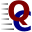
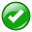
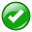
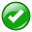
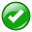
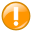
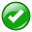
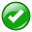
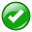
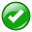
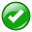
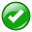
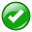
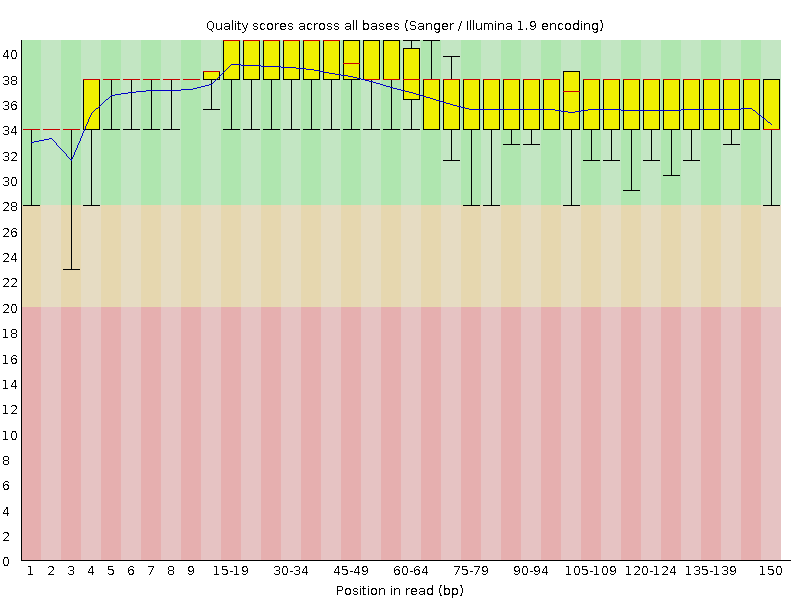
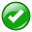
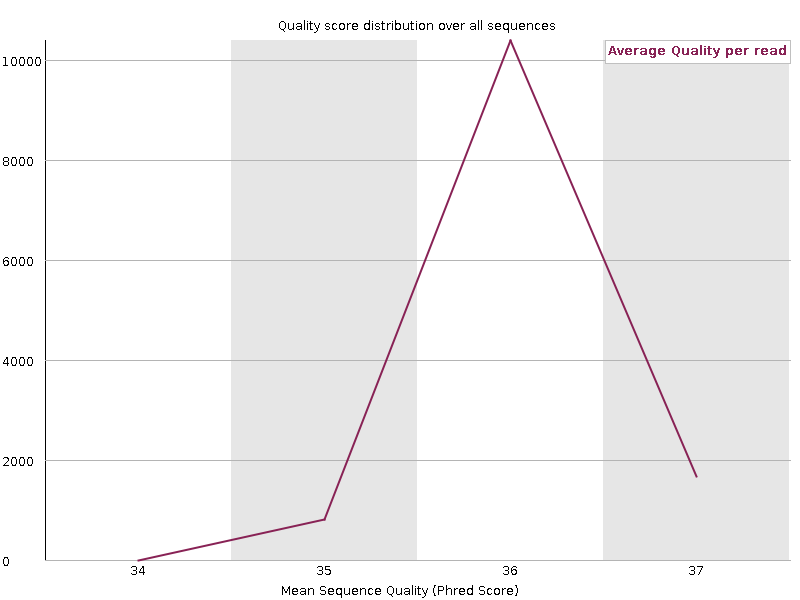
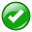
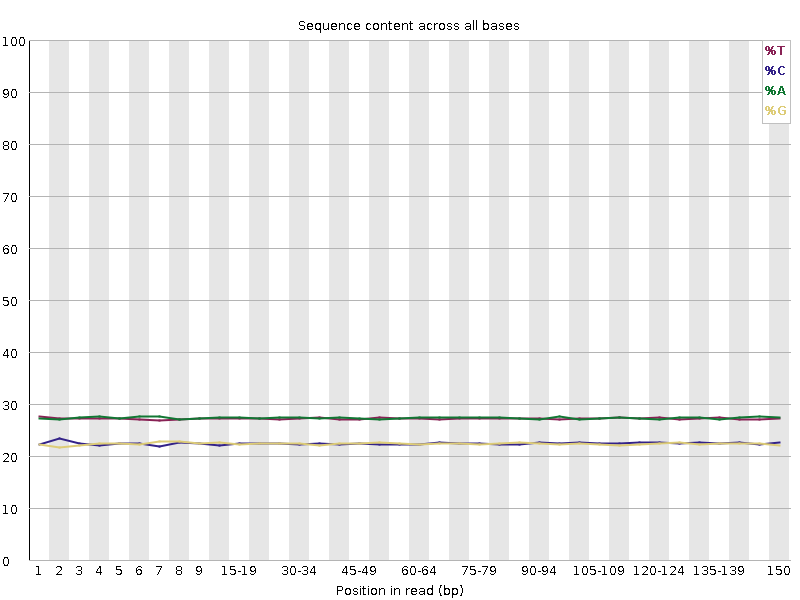
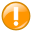
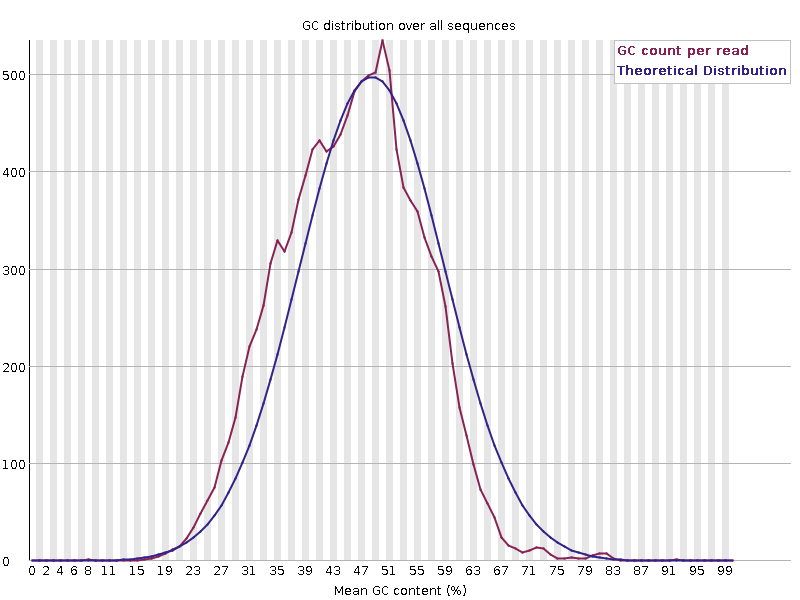
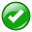
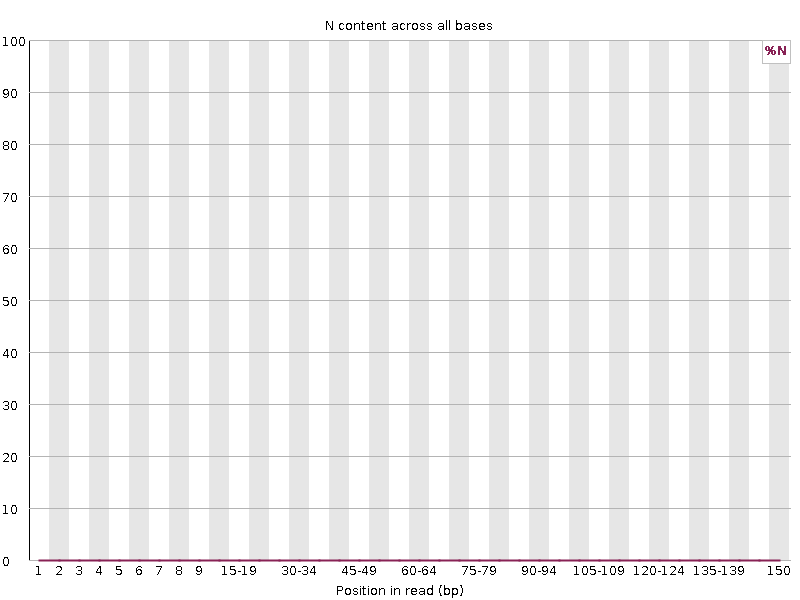
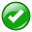
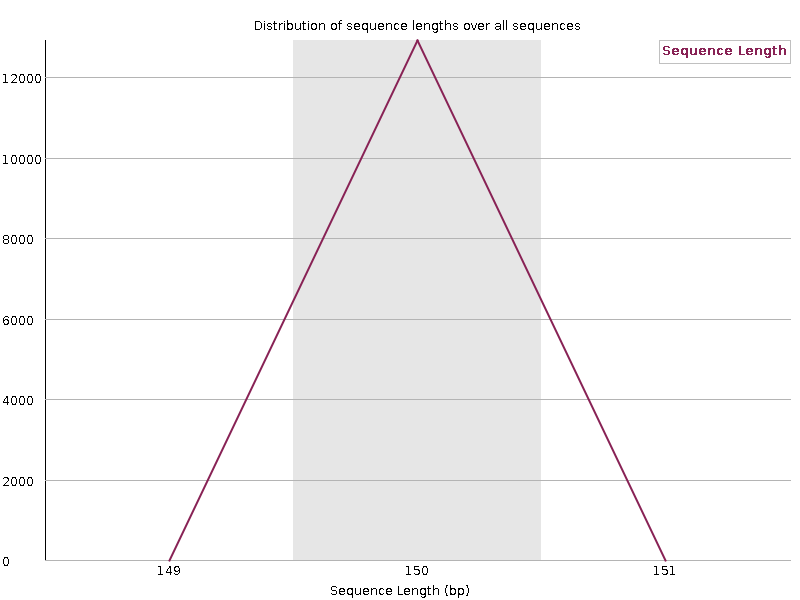
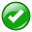
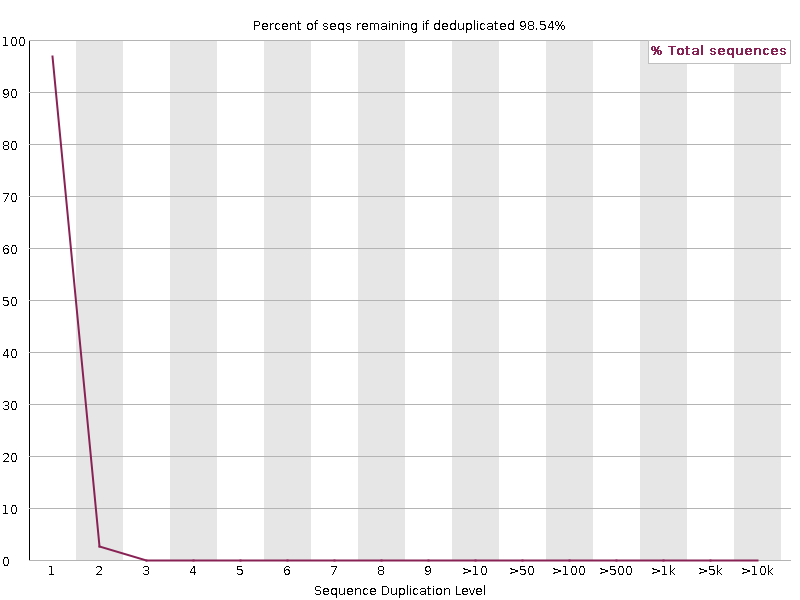
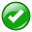
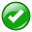
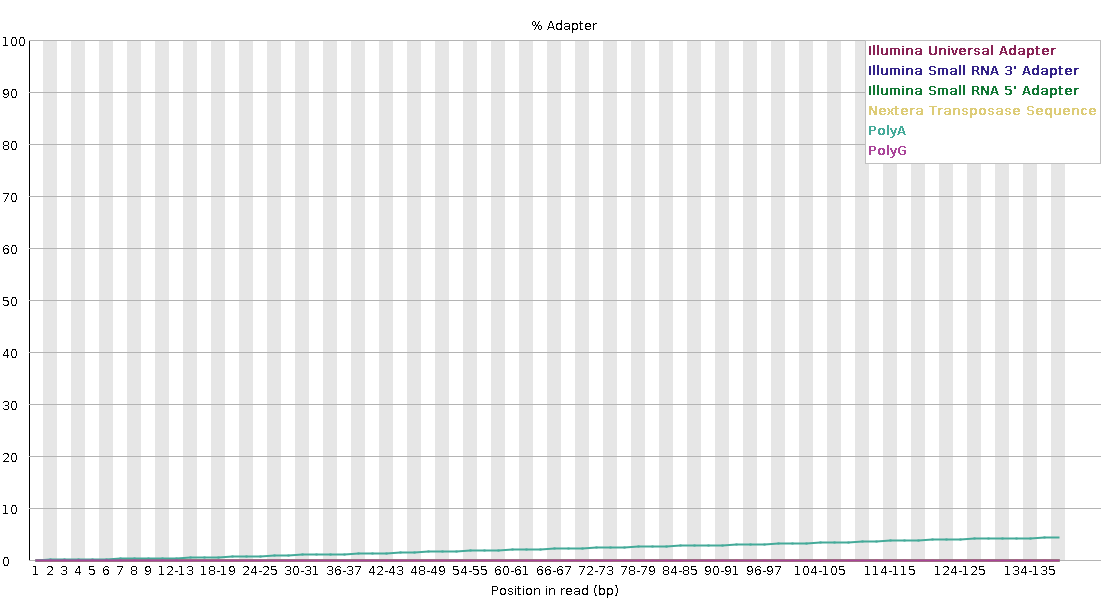

In [9]:
#Código em Python para visualizar o relatório HTML gerado pelo FastQC
import IPython
IPython.display.HTML('./fastqc/BRCA1_WT_R1_fastqc.html')
IPython.display.HTML(open('./fastqc/BRCA1_WT_R1_fastqc.html').read())



💬 ❗ Baixo temos outro exemplo de imagem do FastQC:

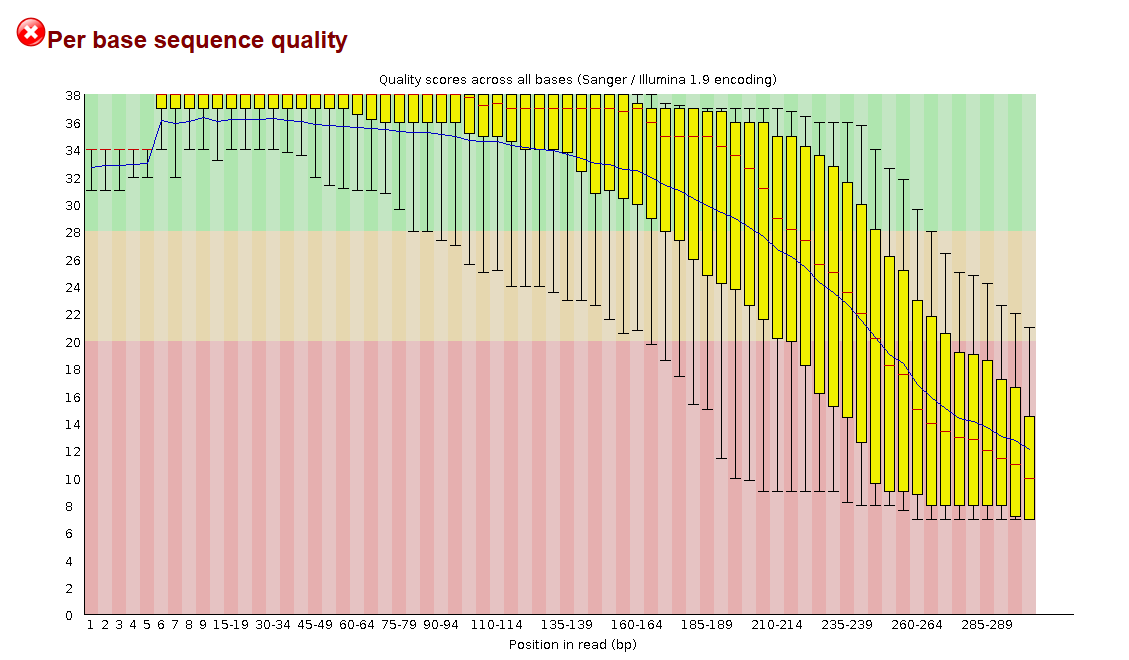

💬 ❗ O FastQC gera um relatório por arquivo Fastq. É comum um estudo ter vários dados de sequenciamento e para fazer a análise de qualidade de todos os dados é preciso agregar os resultados do FastQC de forma intuitiva. Para essa tarefa podemos usar o MultiQC, já instalado na etapa anterior no ambiente Mamba quality.

In [10]:
# Executando o MultiQC para agregar relatórios do FastQC
!echo -e "\n### Rodando o Multiqc na para os arquivos da pasta brca1 \n"
!cd /content/fastqc/ && multiqc .
!cp ./brca1/multiqc_report1.html ./fastqc/



### Rodando o Multiqc na para os arquivos da pasta brca1 


/// ]8;id=107827;https://multiqc.info\MultiQC]8;;\ 🔍 v1.29

       file_search | Search path: /content/fastqc
         searching | ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 12/12  
            fastqc | Found 6 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


💬 ❗ Baixe o arquivo multiqc_report.html, gerado dentro da pasta fastqc, para sua máquina e abra esse arquivo em um navegador para visualizar a análise do MultiQC. Em seguida, baixe o arquivo multiqc_report1.html e compare as diferenças.

💬 ❗ Após a análise do FastQC/MultiQC, vamos fazer uma filtragem de sequências de baixa qualidade, visando um dado de melhor para as análises seguintes. Para isso, instalaremos o fastp no mesmo ambiente Mamba do FastQC/MultiQC.

Para mais informações:

* [fastp](https://github.com/OpenGene/fastp)

In [11]:
# Usando o mesmo ambiente conda do FastQC para instalar o fastp
!echo -e "\n### Instalando o fastp \n"
!mamba activate quality
!mamba install -c bioconda fastp --quiet


### Instalando o fastp 

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


💬 ❗ Usaremos o fastp recém instalado para fazer a filtragem das sequências

**Observação:** Como estamos usando dados simulados, poucas sequências são filtradas. Para mostrar essa diferença, faremos uma filtragem mais restrita apenas dos dados de BRCA1_WT.

In [12]:
# Utilizando o fastp
# É comum se referir a esta etapa como "trimagem" e esses arquivos como "trimados"
!echo -e "\n### Criando a pasta trimmed para armazenar os arquivos trimados \n"
!mkdir trimmed
!echo -e "\n### Filtrando as sequências com o fastp \n"

!fastp -i ./brca1/BRCA1_WT_R1.fq.gz -I ./brca1/BRCA1_WT_R2.fq.gz --detect_adapter_for_pe -o ./trimmed/BRCA1_WT_R1_Trim.fq.gz -O ./trimmed/BRCA1_WT_R2_Trim.fq.gz -h ./trimmed/BRCA1_WT_Trim.html --qualified_quality_phred 20
!fastp -i ./brca1/BRCA1_185delAG_R1.fq.gz -I ./brca1/BRCA1_185delAG_R2.fq.gz --detect_adapter_for_pe -o ./trimmed/BRCA1_185delAG_R1_Trim.fq.gz -O ./trimmed/BRCA1_185delAG_R2_Trim.fq.gz -h ./trimmed/BRCA1_185delAG_Trim.html --qualified_quality_phred 20
!fastp -i ./brca1/BRCA1_c.5266dupC_R1.fq.gz -I ./brca1/BRCA1_c.5266dupC_R2.fq.gz --detect_adapter_for_pe -o ./trimmed/BRCA1_c.5266dupC_R1_Trim.fq.gz -O ./trimmed/BRCA1_c.5266dupC_R2_Trim.fq.gz -h ./trimmed/BRCA1_c.5266dupC_Trim.html --qualified_quality_phred 20

!echo -e "Filtrando novamente o  BRCA1_WT mas aumentando o phred score para 35"
!fastp -i ./brca1/BRCA1_WT_R1.fq.gz -I ./brca1/BRCA1_WT_R2.fq.gz --detect_adapter_for_pe -o ./trimmed/BRCA1_WT_R1_Trim35.fq.gz -O ./trimmed/BRCA1_WT_R2_Trim35.fq.gz -h ./trimmed/BRCA1_WT_Trim35.html --qualified_quality_phred 35



### Criando a pasta trimmed para armazenar os arquivos trimados 


### Filtrando as sequências com o fastp 

Detecting adapter sequence for read1...
No adapter detected for read1

Detecting adapter sequence for read2...
No adapter detected for read2

Read1 before filtering:
total reads: 12910
total bases: 1936500
Q20 bases: 1898131(98.0186%)
Q30 bases: 1775298(91.6756%)
Q40 bases: 380897(19.6694%)

Read2 before filtering:
total reads: 12910
total bases: 1936500
Q20 bases: 1884320(97.3054%)
Q30 bases: 1735264(89.6083%)
Q40 bases: 379673(19.6061%)

Read1 after filtering:
total reads: 12910
total bases: 1936500
Q20 bases: 1898131(98.0186%)
Q30 bases: 1775298(91.6756%)
Q40 bases: 380897(19.6694%)

Read2 after filtering:
total reads: 12910
total bases: 1936500
Q20 bases: 1884320(97.3054%)
Q30 bases: 1735264(89.6083%)
Q40 bases: 379673(19.6061%)

Filtering result:
reads passed filter: 25820
reads failed due to low quality: 0
reads failed due to too many N: 0
reads failed due to too short: 0

💬 ❗ Vamos visualizar um exemplo do relatório do Fastp

In [13]:
#Código em Python para visualizar o relatório HTML gerado pelo FastQC
import IPython
IPython.display.HTML('./trimmed/BRCA1_WT_Trim35.html')
IPython.display.HTML(open('./trimmed/BRCA1_WT_Trim35.html').read())


fastp version:,1.0.0 (https://github.com/OpenGene/fastp)
sequencing:,paired end (150 cycles + 150 cycles)
mean length before filtering:,"150bp, 150bp"
mean length after filtering:,"150bp, 150bp"
duplication rate:,0.015492%
Insert size peak:,201
total reads:,25.820000 K
total bases:,3.873000 M
Q20 bases:,3.782451 M (97.662045%)
Q30 bases:,3.510562 M (90.641931%)
Q40 bases:,760.570000 K (19.637749%)


#**5. Alinhamento das leituras de sequenciamento contra um genoma de referência**

💬 ❗Vamos Iniciar instalando BWA, umas das principais ferramentas de montagem de genoma por referência.

Para mais informações sobre o BWA:

* [BWA](https://github.com/lh3/bwa)

In [14]:
# Criando ambiente para bwa
!mamba create -n bwa
!mamba activate bwa
!mamba install -c bioconda bwa --quiet


Looking for: []



Preparing transaction: - done
Verifying transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | done
Executing transaction: - done

To activate this environment, use

     $ mamba activate bwa

To deactivate an active environment, use

     $ mamba deactivate

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


💬 ❗ Para iniciar a montagem por referência, precisamos indexar o genoma de referência. Esta etapa cria uma estrutura de dados que permite ao BWA localizar rapidamente as posições no genoma onde as reads podem ser mapeadas, otimizando o processo e uso de recursos computacionais.

In [15]:
# Criando índice do genoma de referência
!bwa index -p ./refGen/chr17_GRCh38 ./refGen/chr17_GRCh38.fasta
# Criando pasta para colocar os arquivos pós-alinhamento
!mkdir aligned

[bwa_index] Pack FASTA... 0.74 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=166514882, availableWord=23716276
[BWTIncConstructFromPacked] 10 iterations done. 39120754 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 72271554 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 101732034 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 127912546 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 151177842 characters processed.
[bwt_gen] Finished constructing BWT in 58 iterations.
[bwa_index] 72.64 seconds elapse.
[bwa_index] Update BWT... 0.57 sec
[bwa_index] Pack forward-only FASTA... 0.47 sec
[bwa_index] Construct SA from BWT and Occ... 41.56 sec
[main] Version: 0.7.19-r1273
[main] CMD: bwa index -p ./refGen/chr17_GRCh38 ./refGen/chr17_GRCh38.fasta
[main] Real time: 118.387 sec; CPU: 115.991 sec


💬 ❗ Com a referência indexada, vamos alinhar as sequências de interesse contra a referência.

In [19]:
# Alinhando as leituras trimmadas (filtradas) contra a referência, gerando o arquivo de alinhamento .bam
!echo -e "Alinhando os genes BRCA1 mutados e não mutado contra a referência\n"
!bwa mem -R "@RG\tID:BRCA1_WT\tSM:BRCA1_WT\tPL:ILLUMINA" ./refGen/chr17_GRCh38 ./trimmed/BRCA1_WT_R1_Trim.fq.gz ./trimmed/BRCA1_WT_R2_Trim.fq.gz -o ./aligned/BRCA1_WT.bam
!bwa mem -R "@RG\tID:BRCA1_185delAG\tSM:BRCA1_185delAG\tPL:ILLUMINA" ./refGen/chr17_GRCh38 ./trimmed/BRCA1_185delAG_R1_Trim.fq.gz ./trimmed/BRCA1_185delAG_R2_Trim.fq.gz -o ./aligned/BRCA1_185delAG.bam
!bwa mem -R "@RG\tID:BRCA1_c.5266dupC\tSM:BRCA1_c.5266dupC\tPL:ILLUMINA" ./refGen/chr17_GRCh38 ./trimmed/BRCA1_c.5266dupC_R1_Trim.fq.gz ./trimmed/BRCA1_c.5266dupC_R2_Trim.fq.gz -o ./aligned/BRCA1_c.5266dupC.bam

Alinhando os genes BRCA1 mutados e não mutado contra a referência

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 25820 sequences (3873000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 12460, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (192, 198, 205)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (166, 231)
[M::mem_pestat] mean and std.dev: (198.55, 9.89)
[M::mem_pestat] low and high boundaries for proper pairs: (153, 244)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 25820 reads in 8.252 CPU sec, 8.344 real sec
[main] Version: 0.7.19-r1273
[main] CMD: bwa mem -R @RG\tID:BRCA1_WT\tSM:BRCA1_WT\tPL:ILLUMINA -o ./aligned/BRCA1_WT.bam ./refGen/chr17_GRCh38 ./trimm

💬 ❗ Para tratar os arquivos de alinhamento instalaremos o Samtools, uma ferramenta amplamente utilizada para manipulação e análise de dados de sequenciamento de DNA.

Para mais informações sobre o Samtools:

* [Github/Samtools](https://github.com/samtools/samtools)
* [Manual](https://www.htslib.org/doc/samtools.html)

In [16]:
# Criando ambiente para samtools para analisar e tratar os dados de alinhamento
!mamba create -n samtools
!mamba activate samtools
!mamba install -c bioconda samtools --quiet


Looking for: []



Preparing transaction: - done
Verifying transaction: | / - \ | / - \ | / - \ | / - \ done
Executing transaction: / done

To activate this environment, use

     $ mamba activate samtools

To deactivate an active environment, use

     $ mamba deactivate

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


💬 ❗ O Samtools também cria índice para otimizar o processamento. Vamos criar um índice da referência usando o Samtools



In [17]:
!echo -e "\nCriando índice para a referência\n"
# Cria aquivo índice baseado no arquivo FASTA da referência
!samtools faidx ./refGen/chr17_GRCh38.fasta


Criando índice para a referência



💬 ❗ Usaremos o Samtools agora para ordenar as leituras das sequências de interesse conforme a referência, gerando arquivos binários. Após ordenadas, serão criados índices das sequências de interesse ordenadas.



In [20]:
!echo -e "\nOrdenando leituras para BRCA1_WT\n"
# Ordena as leituras de acordo com a posição no genoma
!samtools sort -o ./aligned/BRCA1_WT_sorted.bam ./aligned/BRCA1_WT.bam
# Indexa arquivos SAM, BAM ou CRAN compactados
!samtools index ./aligned/BRCA1_WT_sorted.bam
# Faz uma avaliação completa do arquivo para gerar estatísticas básicas
!samtools flagstat ./aligned/BRCA1_WT_sorted.bam

!echo -e "\nOrdenando leituras para BRCA1_185delAG\n"
# Ordena as leituras de acordo com a posição no genoma
!samtools sort -o ./aligned/BRCA1_185delAG_sorted.bam ./aligned/BRCA1_185delAG.bam
# Indexa arquivos SAM, BAM ou CRAN compactados
!samtools index ./aligned/BRCA1_185delAG_sorted.bam
# Faz uma avaliação completa do arquivo para gerar estatísticas básicas
!samtools flagstat ./aligned/BRCA1_185delAG_sorted.bam

!echo -e "\nOrdenando leituras para BRCA1_c.5266dupC\n"
# Ordena as leituras de acordo com a posição no genoma
!samtools sort -o ./aligned/BRCA1_c.5266dupC_sorted.bam ./aligned/BRCA1_c.5266dupC.bam
# Indexa arquivos SAM, BAM ou CRAN compactados
!samtools index ./aligned/BRCA1_c.5266dupC_sorted.bam
# Faz uma avaliação completa do arquivo para gerar estatísticas básicas
!samtools flagstat ./aligned/BRCA1_c.5266dupC_sorted.bam


Ordenando leituras para BRCA1_WT

25820 + 0 in total (QC-passed reads + QC-failed reads)
25820 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
25820 + 0 mapped (100.00% : N/A)
25820 + 0 primary mapped (100.00% : N/A)
25820 + 0 paired in sequencing
12910 + 0 read1
12910 + 0 read2
25818 + 0 properly paired (99.99% : N/A)
25820 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)

Ordenando leituras para BRCA1_185delAG

25820 + 0 in total (QC-passed reads + QC-failed reads)
25820 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
25820 + 0 mapped (100.00% : N/A)
25820 + 0 primary mapped (100.00% : N/A)
25820 + 0 paired in sequencing
12910 + 0 read1
12910 + 0 read2
25818 + 0 properly paired (99.99% : N/A)
25820 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a differ

💬 ❗ Verificando o começo de um dos arquivos gerados pelo Samtools

In [23]:
# Imprime as primeiras leituras do arquivo BAM
#!cat ./aligned/BRCA1_WT_sorted.bam | head
!samtools view ./aligned/BRCA1_WT_sorted.bam | head

NG_005905.2-190	99	NC_000017.11	43024322	60	150M	=	43024373	201	TAGCTGGGATTACAGGCGCCCACCGTGCGGGTTGCACCGTGTTAGCCAGGATGATAGTCTCGATCTCCTGACCTCTTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGTATTACAGGCGTGAGCCACCGCGCCCGGCCTATTGTCAGAC	CC=1GGGGGGGGG=GJCGGGJGJJGGJGJJJGJ(GJJCJGGGGGGJGGJJJGJG1GJJGGGGJ8GGGJGGCGJGCCCGGGGCCGGCGGC=CGGCGGG=GGJGGGG(GGGGCCGGGGGCCGCGCGGGGCGGCGGGCCGGGGGCGCGCGGGG	NM:i:1	MD:Z:33T116	MC:Z:150M	MQ:i:60	AS:i:145	XS:i:78	RG:Z:BRCA1_WT
NG_005905.2-12378	99	NC_000017.11	43024345	60	150M	=	43024387	192	CGTGCGGGTTTCACCGTGTTAGCCAGGATGATAGTCTCGATCTCCTGACCTCTTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGTATTACAGGCGTGAGCCACCGCGCCCGGCCTATTGTCAGACTCTTAATCAAGCCTGACTTTTGG	CCCGGGGGGGGGGJJGJCJJJJJJGGJJJJJJJJGJJJGGGGJJGCJJGJG8CGJGGCJGCGJGC=CGGGGGGGG=GGGG=CGCGGG=GGGGGCGGCGGGCCCCGGCGGGGGGGGGC=GGGGGC=G1CCGCGGGGGGGG=GGGGGCGGCC	NM:i:0	MD:Z:150	MC:Z:150M	MQ:i:60	AS:i:150	XS:i:78	RG:Z:BRCA1_WT
NG_005905.2-4660	99	NC_000017.11	43024358	60	150M	=	43024404	196	CCGTGTTAGCCAGGATGATAGTCTCGATCTCCTGACCTCTTGATCCGCCCGCCTCGGCCTCCCAAAGT

💬 ❗ Salvando somente as leituras que mapearam contra a referência.

In [24]:
!echo -e "\nSalvando somente as leituras que mapearam contra a referência\n"
# É posossível salvar somente as leituras que mapearam contra o genoma
!samtools view -b -F 4 ./aligned/BRCA1_WT_sorted.bam > ./aligned/BRCA1_WT_mapped.bam

!samtools view -b -F 4 ./aligned/BRCA1_185delAG_sorted.bam > ./aligned/BRCA1_185delAG_mapped.bam

!samtools view -b -F 4 ./aligned/BRCA1_c.5266dupC_sorted.bam > ./aligned/BRCA1_c.5266dupC_mapped.bam



Salvando somente as leituras que mapearam contra a referência



💬 ❗ Indexando os arquivos binários mapeados pelo Samtools

In [25]:
# Indexando os arquivos mapped
!echo -e "\nIndexando os arquivos mapped\n"
!samtools index ./aligned/BRCA1_WT_mapped.bam
!samtools index ./aligned/BRCA1_185delAG_mapped.bam
!samtools index ./aligned/BRCA1_c.5266dupC_mapped.bam


Indexando os arquivos mapped



💬 ❗ Verificando os arquivos binários indexados pelo Samtools

In [26]:
# Verificando arquivos
!echo -e "\nVerificando arquivo BRCA1_WT_mapped.bam\n"
!samtools view -H ./aligned/BRCA1_WT_mapped.bam
!echo -e "\nVerificando arquivo BRCA1_185delAG_mapped.bam\n"
!samtools view -H ./aligned/BRCA1_185delAG_mapped.bam
!echo -e "\nVerificando arquivo BRCA1_c.5266dupC_mapped.bam\n"
!samtools view -H ./aligned/BRCA1_c.5266dupC_mapped.bam


Verificando arquivo BRCA1_WT_mapped.bam

@HD	VN:1.5	SO:coordinate
@SQ	SN:NC_000017.11	LN:83257441
@RG	ID:BRCA1_WT	SM:BRCA1_WT	PL:ILLUMINA
@PG	ID:bwa	PN:bwa	VN:0.7.19-r1273	CL:bwa mem -R @RG\tID:BRCA1_WT\tSM:BRCA1_WT\tPL:ILLUMINA ./refGen/chr17_GRCh38 ./trimmed/BRCA1_WT_R1_Trim.fq.gz ./trimmed/BRCA1_WT_R2_Trim.fq.gz -o ./aligned/BRCA1_WT.bam
@PG	ID:samtools	PN:samtools	PP:bwa	VN:1.22	CL:samtools sort -o ./aligned/BRCA1_WT_sorted.bam ./aligned/BRCA1_WT.bam
@PG	ID:samtools.1	PN:samtools	PP:samtools	VN:1.22	CL:samtools view -b -F 4 ./aligned/BRCA1_WT_sorted.bam
@PG	ID:samtools.2	PN:samtools	PP:samtools.1	VN:1.22	CL:samtools view -H ./aligned/BRCA1_WT_mapped.bam

Verificando arquivo BRCA1_185delAG_mapped.bam

@HD	VN:1.5	SO:coordinate
@SQ	SN:NC_000017.11	LN:83257441
@RG	ID:BRCA1_185delAG	SM:BRCA1_185delAG	PL:ILLUMINA
@PG	ID:bwa	PN:bwa	VN:0.7.19-r1273	CL:bwa mem -R @RG\tID:BRCA1_185delAG\tSM:BRCA1_185delAG\tPL:ILLUMINA ./refGen/chr17_GRCh38 ./trimmed/BRCA1_185delAG_R1_Trim.fq.gz ./trimmed/BR

💬 ❗ Salvando os arquivos mapeados das sequências de interesse em fasta.

In [27]:
!echo -e "\nCriando a pasta mapped para salvar os fastas mapeados\n"
!mkdir mapped

!echo -e "\nSalvando em fasta as leituras que mapearam contra a referência\n"
!samtools fasta ./aligned/BRCA1_WT_mapped.bam > ./mapped/BRCA1_WT_mapped_reads.fasta

!samtools fasta ./aligned/BRCA1_185delAG_mapped.bam > ./mapped/BRCA1_185delAG_mapped_reads.fasta

!samtools fasta ./aligned/BRCA1_c.5266dupC_mapped.bam > ./mapped/BRCA1_c.5266dupC_mapped_reads.fasta

# Imprime as primeiras linhas do arquivo
!echo -e "\nlistando o começo do arquivo BRCA1_WT_mapped_reads.fasta\n"
!head ./mapped/BRCA1_WT_mapped_reads.fasta

!echo -e "Listando os arquivos na pasta mapped\n"
!ls -lh ./mapped


Criando a pasta mapped para salvar os fastas mapeados


Salvando em fasta as leituras que mapearam contra a referência

samtools fasta: Coordinate sorted file.  Read pairs may be out of order
[M::bam2fq_mainloop] discarded 0 singletons
[M::bam2fq_mainloop] processed 25820 reads
samtools fasta: Coordinate sorted file.  Read pairs may be out of order
[M::bam2fq_mainloop] discarded 0 singletons
[M::bam2fq_mainloop] processed 25820 reads
samtools fasta: Coordinate sorted file.  Read pairs may be out of order
[M::bam2fq_mainloop] discarded 0 singletons
[M::bam2fq_mainloop] processed 25820 reads

listando o começo do arquivo BRCA1_WT_mapped_reads.fasta

>NG_005905.2-190/1
TAGCTGGGATTACAGGCGCCCACCGTGCGGGTTGCACCGTGTTAGCCAGGATGATAGTCTCGATCTCCTGACCTCTTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGTATTACAGGCGTGAGCCACCGCGCCCGGCCTATTGTCAGAC
>NG_005905.2-12378/1
CGTGCGGGTTTCACCGTGTTAGCCAGGATGATAGTCTCGATCTCCTGACCTCTTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGTATTACAGGCGTGAGCCACCGCGCCCGGCCTATTGTCAGACTCTTAATCAAGCCTGACTTTTGG
>

#**6. Visualização de alinhamento**

💬 ❗ Para visualizar o alinhamento, utilizaremos o IGV. Novamente vamos usar o PIP para instalar o IGV no Google Colab.

In [28]:
#Instalando o IGV
!pip install -q igv-notebook
# Clonando reposistório do github
!git clone https://github.com/igvteam/igv-notebook


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.6/856.6 kB 26.5 MB/s eta 0:00:00
Cloning into 'igv-notebook'...
remote: Enumerating objects: 680, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 680 (delta 89), reused 117 (delta 65), pack-reused 525 (from 1)
Receiving objects: 100% (680/680), 3.67 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (439/439), done.


💬 ❗ Copiando os arquivos da nossa referência para a pasta /igv-notebook/examples/data

In [29]:
# Copiando os arquivos para o diretório /igv-notebook/examples/data
!cp ./refGen/chr17_GRCh38.fasta ./refGen/chr17_GRCh38.fasta.fai ./igv-notebook/examples/data
# Listando os arquivos dentro do diretório
!echo -e "\n ### Listando arquivos na pasta ./igv-notebook/examples/data ###\n"
!ls ./igv-notebook/examples/data
# Navegando até o diretório do IGV
!cd igv-notebook
# Listando os arquivos dentro do diretório aligned
!echo -e "\n ### Listando arquivos na aligned ### \n"
!ls aligned


 ### Listando arquivos na pasta ./igv-notebook/examples/data ###

chr17_GRCh38.fasta	   gstt1_sample.bam	 NC_045512v2.fa.fai
chr17_GRCh38.fasta.fai	   gstt1_sample.bam.bai  refgene.hg19.snippet.bed
cytoband.hg19.snippet.txt  hg19.snippet.fasta	 session.json
example.vcf		   NC_045512v2.fa

 ### Listando arquivos na aligned ### 

BRCA1_185delAG.bam		 BRCA1_c.5266dupC_sorted.bam
BRCA1_185delAG_mapped.bam	 BRCA1_c.5266dupC_sorted.bam.bai
BRCA1_185delAG_mapped.bam.bai	 BRCA1_WT.bam
BRCA1_185delAG_sorted.bam	 BRCA1_WT_mapped.bam
BRCA1_185delAG_sorted.bam.bai	 BRCA1_WT_mapped.bam.bai
BRCA1_c.5266dupC.bam		 BRCA1_WT_sorted.bam
BRCA1_c.5266dupC_mapped.bam	 BRCA1_WT_sorted.bam.bai
BRCA1_c.5266dupC_mapped.bam.bai


💬 ❗ Abaixo utilizaremos o IGV usando o python direto do console para gerar a imagem no navegador.

In [30]:
#Código em Python usando a bilbioteca igv_notebook para visualização
import igv_notebook

# Inicializa o ambiente IGV no Jupyter Notebook
igv_notebook.init()

# Configura o navegador IGV para o genoma hg38 e a região do gene BRCA1
b = igv_notebook.Browser({
    "genome": "hg38",  # Referência do genoma humano GRCh38/hg38
    "locus": "chr17:43,088,889-43,099,605"  # Região específica do gene BRCA1 no cromossomo 17 (hg38)
})

# Carrega uma trilha de alinhamento BAM (exemplo fictício)
b.load_track({
    "name": "BRCA1 Alignments",
    "path": "./aligned/BRCA1_185delAG_sorted.bam",  # Caminho para um arquivo BAM local com dados de alinhamento
    "indexPath": "./aligned/BRCA1_185delAG_sorted.bam.bai",  # Caminho para o índice do arquivo BAM
    "format": "bam",
    "type": "alignment"
})

# Exibe o navegador IGV no notebook
b.zoom_in()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💬 ❗ Na imagem gerada pelo IGV, as barras vermelhas e azuis indicam variantes ou discrepâncias entre as leituras e a sequência de referência:

Vermelho: Substituições ou variantes específicas nas leituras.

Azul: Inserções ou deleções (indels) detectadas nas leituras.

Pontos coloridos dentro das barras cinzas indicam nucleotídeos que diferem da sequência de referência.

#**7. Chamada de Variantes**

💬 ❗ Para a chamada de variantes usaremos o GATK, com a função HaplotypeCaller, usando o genoma de referência e as sequências de interesse previamente alinhadas contra o genômade referência.

Para mais informações sobre o GATK, clique nos links abaixo:

* [GATK/Broad Institute](https://gatk.broadinstitute.org/hc/en-us)
* [GATK - Documentação](https://gatk.broadinstitute.org/hc/en-us/categories/360002310591)




In [31]:
# Criando ambiente mamba para o GATK e instalando a aplicação
!mamba create -n gatk
!mamba activate gatk
!mamba install -c bioconda gatk4 --quiet


Looking for: []



Preparing transaction: - done
Verifying transaction: | / - \ | / - \ | / - \ | / - done
Executing transaction: | done

To activate this environment, use

     $ mamba activate gatk

To deactivate an active environment, use

     $ mamba deactivate

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


💬 ❗ Criaremos um arquivo de dicionário que contém informações sobre as referências genômicas usadas em uma análise. Ele é necessário para várias ferramentas do GATK, que requerem a ordenação e a estruturação correta da sequência de referência com a qual estão sendo comparadas as variantes genômicas.

In [32]:
# Criando o dicionário para a referência
!gatk CreateSequenceDictionary \
    -R /content/refGen/chr17_GRCh38.fasta \
    -O /content/refGen/chr17_GRCh38.dict


Using GATK jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar CreateSequenceDictionary -R /content/refGen/chr17_GRCh38.fasta -O /content/refGen/chr17_GRCh38.dict
20:37:07.218 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Mon Jun 16 20:37:07 UTC 2025] CreateSequenceDictionary --OUTPUT /content/refGen/chr17_GRCh38.dict --REFERENCE /content/refGen/chr17_GRCh38.fasta --TRUNCATE_NAMES_AT_WHITESPACE true --NUM_SEQUENCES 2147483647 --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --MAX_RECORDS_IN_RAM 500000 --CREATE_INDEX false --CREATE_MD5_FILE false --help false --versi

💬 ❗ Finalmente faremos as chamadas de variantes para as 3 amostras que temos contra a referência. A execução leva em torno de 5 minutos.

In [33]:
# Criando a pasta variants
!mamba activate gatk
!echo -e "\nCriando a pasta varients\n"
!mkdir variants
!echo -e "\nChamando variantes para BRCA1_WT\n"
!pwd
#!touch ./variants/BRCA1_WT.g.vcf.gz
!gatk HaplotypeCaller -R /content/refGen/chr17_GRCh38.fasta -I ./aligned/BRCA1_WT_mapped.bam -O ./variants/BRCA1_WT.g.vcf.gz -ERC GVCF
!gatk HaplotypeCaller -R /content/refGen/chr17_GRCh38.fasta -I ./aligned/BRCA1_185delAG_mapped.bam -O ./variants/BRCA1_185delAG.g.vcf.gz -ERC GVCF
!gatk HaplotypeCaller -R /content/refGen/chr17_GRCh38.fasta -I ./aligned/BRCA1_c.5266dupC_mapped.bam -O ./variants/BRCA1_c.5266dupC.g.vcf.gz -ERC GVCF


Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.


Criando a pasta varients


Chamando variantes para BRCA1_WT

/content
Using GATK jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar HaplotypeCaller -R /content/refGen/chr17_GRCh38.fasta -I ./aligned/BRCA1_WT_mapped.bam -O ./variants/BRCA1_WT.g.vcf.gz -ERC GVCF
20:41:17.469 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
20:41:17.713 INFO  HaplotypeCaller - ------------------------------------------------------------
20:41:17.719 INFO  HaplotypeCaller - The Genome Analysis T

💬 ❗ Abaixo combinaremos as chamadas de variantes das amostras em um cohort.

In [34]:
# Combinar os GVCF em um arquivo
!gatk CombineGVCFs -R /content/refGen/chr17_GRCh38.fasta -V ./variants/BRCA1_WT.g.vcf.gz -V ./variants/BRCA1_185delAG.g.vcf.gz -V ./variants/BRCA1_c.5266dupC.g.vcf.gz -O ./variants/cohort.g.vcf.gz


Using GATK jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar CombineGVCFs -R /content/refGen/chr17_GRCh38.fasta -V ./variants/BRCA1_WT.g.vcf.gz -V ./variants/BRCA1_185delAG.g.vcf.gz -V ./variants/BRCA1_c.5266dupC.g.vcf.gz -O ./variants/cohort.g.vcf.gz
20:50:30.701 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
20:50:31.214 INFO  CombineGVCFs - ------------------------------------------------------------
20:50:31.219 INFO  CombineGVCFs - The Genome Analysis Toolkit (GATK) v4.6.2.0
20:50:31.221 INFO  CombineGVCFs - For support and documentation go to https://software.broadinstitute.org/gatk/
20:50:31.2

💬 ❗ Vamos transformar arquivos de variantes no formato GVCF (Genomic Variant Call Format) em um VCF final que contém as variantes genotipadas.

In [35]:
#  Genotipagem de variantes
!gatk GenotypeGVCFs -R /content/refGen/chr17_GRCh38.fasta -V ./variants/cohort.g.vcf.gz -O ./variants/cohort.vcf.gz


Using GATK jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar GenotypeGVCFs -R /content/refGen/chr17_GRCh38.fasta -V ./variants/cohort.g.vcf.gz -O ./variants/cohort.vcf.gz
20:53:07.836 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
20:53:08.337 INFO  GenotypeGVCFs - ------------------------------------------------------------
20:53:08.343 INFO  GenotypeGVCFs - The Genome Analysis Toolkit (GATK) v4.6.2.0
20:53:08.344 INFO  GenotypeGVCFs - For support and documentation go to https://software.broadinstitute.org/gatk/
20:53:08.345 INFO  GenotypeGVCFs - Executing as root@4f557e2228b9 on Linux v6.1.123+ amd

💬 ❗ Agora vamos aplicar alguns filtros de qualidade das chamadas de variantes.

Abaixo algumas legendas:

*   QD (QualByDepth): é calculado como a razão entre a qualidade de chamada de variante (QUAL) e a profundidade de cobertura no local da variante (DP).
*   FS (Fisher Strand Bias): é uma métrica que mede a presença de viés de strand em torno de uma chamada de variante. Ocorre quando as variantes são detectadas preferencialmente em um dos strands (fitas) do DNA durante o sequenciamento
*   MQ (Mapping Quality): representa a qualidade de mapeamento das leituras (reads) que suportam a variante.





In [36]:
# Aplicando alguns Filtros de qualidade
!gatk VariantFiltration -R /content/refGen/chr17_GRCh38.fasta -V ./variants/cohort.vcf.gz -O ./variants/cohort_filtered.vcf.gz --filter-expression "QD < 2.0 || FS > 60.0 || MQ < 40.0" --filter-name "my_snp_filter"


Using GATK jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar VariantFiltration -R /content/refGen/chr17_GRCh38.fasta -V ./variants/cohort.vcf.gz -O ./variants/cohort_filtered.vcf.gz --filter-expression QD < 2.0 || FS > 60.0 || MQ < 40.0 --filter-name my_snp_filter
20:57:41.660 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.6.2.0-0/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
20:57:41.958 INFO  VariantFiltration - ------------------------------------------------------------
20:57:41.964 INFO  VariantFiltration - The Genome Analysis Toolkit (GATK) v4.6.2.0
20:57:41.964 INFO  VariantFiltration - For support and documentation go to https://software.broadin

💬 ❗ Verificando o arquivo com as variantes chamadas.

Algumas informações importantes:

* GT (Genotype): Representa o genótipo da amostra para aquela posição. Por exemplo, "0/0" indica homozigoto para o alelo de referência. Já "0/1" indica que a amostra é heterozigota (uma cópia de cada alelo), enquanto "1/1" indica homozigoto para o alelo alternativo.

* AD (Allelic Depth): Mostra as contagens de leitura para os alelos de referência e alternativo. Por exemplo, AD=10,5 significa que foram observadas 10 leituras para o alelo de referência e 5 leituras para o alelo alternativo.

* DP (Depth of Coverage): Representa o número total de leituras que cobrem a posição variante, ou seja, a soma dos valores de AD. No exemplo anterior, seria 15 (10 leituras de referência + 5 leituras alternativos).

* GQ (Genotype Quality): Indica a confiança da chamada do genótipo. Geralmente, quanto maior o valor, maior a confiabilidade do genótipo chamado.

* PL (Phred-scaled Likelihoods): Indica as probabilidades relativas de cada genótipo possível (homozigoto referência, heterozigoto, homozigoto alternativo) em uma escala Phred . Quanto menor o valor, mais provável é o genótipo. Por exemplo, PL=0,50,100 indica que o genótipo homozigoto referência é o mais provável (PL=0).

In [37]:
!zcat ./variants/cohort_filtered.vcf.gz

##fileformat=VCFv4.2
##ALT=<ID=NON_REF,Description="Represents any possible alternative allele not already represented at this location by REF and ALT">
##FILTER=<ID=LowQual,Description="Low quality">
##FILTER=<ID=my_snp_filter,Description="QD < 2.0 || FS > 60.0 || MQ < 40.0">
##FORMAT=<ID=AD,Number=R,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth (reads with MQ=255 or with bad mates are filtered)">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=MIN_DP,Number=1,Type=Integer,Description="Minimum DP observed within the GVCF block">
##FORMAT=<ID=PGT,Number=1,Type=String,Description="Physical phasing haplotype information, describing how the alternate alleles are phased in relation to one another; will always be heterozygous and is not intended to describe called alleles">
##FOR

#**8. Anotação de variantes**

💬 ❗ Existem várias bases de dados com informações de variantes conhecidas. Temos também ferramentas como o ANNOVAR que é capaz de baixar essas bases e fazer anotações nos nossos arquivos de variantes, adicionando informações importantes de forma conveniente. Usaremos o bcftools para adicionar anotações baseadas na base de dados do Clinvar.

Para mais informações:

* [bcftools](https://github.com/samtools/bcftools)
* [ANNOVAR](https://annovar.openbioinformatics.org/en/latest/)


In [38]:
# Criando ambiente mamba para o BCFTOOLS e instalando a aplicação
!mamba create -n bcftools
!mamba activate bcftools
!mamba install -c bioconda bcftools --quiet


Looking for: []



Preparing transaction: - done
Verifying transaction: | / - \ | / - \ | / - \ | / done
Executing transaction: \ done

To activate this environment, use

     $ mamba activate bcftools

To deactivate an active environment, use

     $ mamba deactivate

Run 'mamba init' to be able to run mamba activate/deactivate
and start a new shell session. Or use conda to activate/deactivate.

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


💬 ❗ Vamos verificar o formato da minibase do clinvar, que foi baixadas do github na etapa 3.

In [39]:
# Verificando minibase do Clinvar
!zcat ./brca1/clinvar_mini.vcf.gz

##fileformat=VCFv4.2
##fileDate=20241016
##source=ClinVar
##reference=GRCh37
##INFO=<ID=CLNSIG,Number=.,Type=String,Description="Clinical	significance	for	this	single	variant">
##INFO=<ID=CLNVID,Number=1,Type=String,Description="ClinVar	Variation	ID">
##INFO=<ID=CLNDN,Number=1,Type=String,Description="ClinVar	Disease	Name">
##INFO=<ID=CLNREVSTAT,Number=1,Type=String,Description="Review	status	for	the	clinical	significance	of	the	variant">
##INFO=<ID=CLNALLE,Number=1,Type=Integer,Description="Allele	ID	in	ClinVar">
##INFO=<ID=CLNHGVS,Number=.,Type=String,Description="Variant	in	HGVS	notation">
##INFO=<ID=CLNSRC,Number=1,Type=String,Description="Variant	clinical	source">
##INFO=<ID=CLNSRCID,Number=1,Type=String,Description="ClinVar	source	ID">
##INFO=<ID=CLNDBN,Number=1,Type=String,Description="ClinVar disease name">
##INFO=<ID=CLNACC,Number=1,Type=String,Description="ClinVar accession number">
##INFO=<ID=CLNDSDB,Number=1,Type=String,Description="ClinVar disease database">
##INFO=<ID=CLN

💬 ❗ Agora faremos a anotação do nosso VCF gerado com o bcftools e nossa minibase do Clinvar que foi baixadas do github na etapa 3.

In [41]:
!echo -e "\nCriando a pasta annotated"
!mkdir annotated
!echo -e "\nAnotando o arquivo cohort_filtered.vcf.gz"
# Anotação com o bcftools e a minibase
!bcftools annotate -a ./brca1/clinvar_mini.vcf.gz -c ID,INFO ./variants/cohort_filtered.vcf.gz -o ./annotated/cohort_annotated.vcf



Criando a pasta annotated
mkdir: cannot create directory ‘annotated’: File exists

Anotando o arquivo cohort_filtered.vcf.gz


💬 ❗ Verificando o vcf com as anotações.

In [42]:
# Verificando vcf com as anotações da minibase do Clinvar.
!cat ./annotated/cohort_annotated.vcf

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##ALT=<ID=NON_REF,Description="Represents any possible alternative allele not already represented at this location by REF and ALT">
##FILTER=<ID=LowQual,Description="Low quality">
##FILTER=<ID=my_snp_filter,Description="QD < 2.0 || FS > 60.0 || MQ < 40.0">
##FORMAT=<ID=AD,Number=R,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth (reads with MQ=255 or with bad mates are filtered)">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=MIN_DP,Number=1,Type=Integer,Description="Minimum DP observed within the GVCF block">
##FORMAT=<ID=PGT,Number=1,Type=String,Description="Physical phasing haplotype information, describing how the alternate alleles are phased in relation to one another; will always be heterozygous an

💬 ❗ No começo do treinamento baixamos vários arquivos do github, incluindo ANNOVAR e um VCF com três amostras do 1000 Genomes (ambos estão na pasta brca1). Vamos descompactar o ANNOVAR.

In [43]:
# Descompactando o ANNOVAR.
!tar -xvzf ./brca1/annovar.latest.tar.gz
!ls -lh ./annovar/
!echo -e "\n### Verificando bases que já vem no ANNOVAR dentro da pasta humandb ###\n"
!ls -lhSr ./annovar/humandb/

annovar/
annovar/example/
annovar/example/ex1.avinput
annovar/example/example.simple_region
annovar/example/example.tab_region
annovar/example/ex2.vcf
annovar/example/grantham.matrix
annovar/example/snplist.txt
annovar/example/README
annovar/example/gene_xref.txt
annovar/example/gene_fullxref.txt
annovar/humandb/
annovar/humandb/hg19_refGene.txt
annovar/humandb/hg19_refGeneMrna.fa
annovar/humandb/hg19_refGeneVersion.txt
annovar/humandb/hg19_refGeneWithVer.txt
annovar/humandb/hg19_refGeneWithVerMrna.fa
annovar/humandb/hg19_example_db_generic.txt
annovar/humandb/hg19_example_db_gff3.txt
annovar/humandb/GRCh37_MT_ensGene.txt
annovar/humandb/GRCh37_MT_ensGeneMrna.fa
annovar/humandb/hg19_MT_ensGene.txt
annovar/humandb/hg19_MT_ensGeneMrna.fa
annovar/humandb/genometrax-sample-files-gff/
annovar/humandb/genometrax-sample-files-gff/list
annovar/humandb/genometrax-sample-files-gff/sample_chip_featuretype_hg19.gff
annovar/humandb/genometrax-sample-files-gff/sample_common_snp_featuretype_hg19.gff


💬 ❗ O ANNOVAR facilita o download de novas bases de dados para anotação de vcf. Para verificar as bases disponíveis para os genomas de referência, acesse [a página de downloads do ANNOVAR.](https://annovar.openbioinformatics.org/en/latest/user-guide/download/)



In [44]:
# Usando o ANNOVAR para baixar as bases Clinvar e AbraOM
!./annovar/annotate_variation.pl -buildver hg38 -downdb -webfrom annovar clinvar_20240917 ./annovar/humandb/
!./annovar/annotate_variation.pl -buildver hg38 -downdb -webfrom annovar abraom ./annovar/humandb/
!echo -e "\n ### Verificando as bases baixadas ###"
!ls -lh ./annovar/humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
----------------------------UPDATE AVAILABLE------------------------------
--------------------------------------------------------------------------
         Download from http://www.openbioinformatics.org/annovar/
Changes made in the 2025-03-02 version:
         * turn on -polish by default in table_annovar.pl to fine-tune amino acid changes for coding mutations
         * improve handling of corrupted or incomplete download of ANNOVAR databases during decompression process
         * update the sample files in the genometrax-sample-files-gff directory
         * fixed a bug in URL handling in annotate_variation.pl
         * fixed an issue when calculating protein sequences for mutations affecting multi-mapping transcripts in coding_change.pl
--------------------------------------------------------------------------
--------------------------------------------------------------------------
NOTICE: Do

💬 ❗ Agora usaremos o ANNOVAR para anotar o VCF com as três amostras do 1000 Genomes usandos as bases baixadas.

In [45]:
!gunzip ./brca1/samples2annot.vcf.gz
!./annovar/table_annovar.pl ./brca1/samples2annot.vcf ./annovar/humandb/ -buildver hg38 -out ./annotated/samples_clinvar -remove -protocol clinvar_20240917 -operation f -nastring . -vcfinput
#!./annovar/table_annovar.pl ./brca1/samples2annot.vcf ./annovar/humandb/ -buildver hg38 -out ./annotated/samples_clinvar -remove -protocol abraom -operation f -nastring . -vcfinput

NOTICE: the --polish argument is set ON automatically (use --nopolish to change this behavior)

NOTICE: Running with system command <convert2annovar.pl  -includeinfo -allsample -withfreq -format vcf4 ./brca1/samples2annot.vcf > ./annotated/samples_clinvar.avinput>
NOTICE: Finished reading 6178225 lines from VCF file
NOTICE: A total of 6178013 locus in VCF file passed QC threshold, representing 0 SNPs (0 transitions and 0 transversions) and 6177976 indels/substitutions
NOTICE: Finished writing allele frequencies based on 0 SNP genotypes (0 transitions and 0 transversions) and 18533928 indels/substitutions for 3 samples

NOTICE: Running with system command <./annovar/table_annovar.pl ./annotated/samples_clinvar.avinput ./annovar/humandb/ -buildver hg38 -outfile ./annotated/samples_clinvar -remove -protocol clinvar_20240917 -operation f -nastring . -otherinfo>
NOTICE: the --polish argument is set ON automatically (use --nopolish to change this behavior)
-----------------------------------

💬 ❗ Finalmente vamos verificar variantes patogênicas anotadas pelo ANNOVAR com a base do Clinvar.

In [46]:
!grep "Pathogenic" ./annotated/samples_clinvar.hg38_multianno.vcf

chr1	68449895	chr1-68449896-DEL-1	TG	T	.	.	ID=chr1-68449896-DEL-1;VARTYPE=INDEL;SVTYPE=DEL;SVLEN=-1;SAMPLE=HG02587-h2;AC=0;AN=6;ANNOVAR_DATE=2020-06-08;CLNALLELEID=558585;CLNDN=Leber_congenital_amaurosis_2|Retinitis_pigmentosa_20;CLNDISDB=MONDO:MONDO:0008765,MedGen:C1859844,OMIM:204100,Orphanet:65|MONDO:MONDO:0013425,MedGen:C3151086,OMIM:613794,Orphanet:791;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_conflicts;CLNSIG=Pathogenic/Likely_pathogenic;ONCDN=.;ONCDISDB=.;ONCREVSTAT=.;ONC=.;SCIDN=.;SCIDISDB=.;SCIREVSTAT=.;SCI=.;ALLELE_END	GT	0|0	0|0	0|0
chr1	152311908	chr1-152311909-DEL-2	GCT	G	.	.	ID=chr1-152311909-DEL-2;VARTYPE=INDEL;SVTYPE=DEL;SVLEN=-2;SAMPLE=HG03807-h2;REF_SD=0.93;REF_TRF;AC=0;AN=6;ANNOVAR_DATE=2020-06-08;CLNALLELEID=1019173;CLNDN=not_provided|Autosomal_dominant_ichthyosis_vulgaris|Ichthyosis_vulgaris;CLNDISDB=MedGen:C3661900|MONDO:MONDO:0007810,MedGen:C0432300|MONDO:MONDO:0024304,MedGen:C0079584,OMIM:146700;CLNREVSTAT=criteria_provided,_multiple_submitters,_no_c

# **OBRIGADO!**